In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import datetime as dt
import os
from sqlalchemy import create_engine # database connection
from tqdm import tqdm
import sqlite3
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics.classification import accuracy_score , log_loss
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")

## creating SQL table & Reading data from SQL table

In [2]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [3]:
def create_connection(db_file):
    
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        return(e)
    
    return None
def CheckTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [4]:
read_db = "train.db"
conn_r = create_connection(read_db)
CheckTableExists(conn_r)
conn_r.close

Tables in the databse:
data


<function Connection.close>

In [5]:
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        data = pd.read_sql_query("SELECT * FROM data ORDER BY RANDOM() LIMIT 100001", conn_r)
        conn_r.commit()
        conn_r.close()

In [6]:
data.drop(data.index[0], inplace = True)
y_true = data["is_duplicate"]
data.drop(["Unnamed: 0", "id", "index", "is_duplicate"], axis = 1, inplace = True)

In [7]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
1,0.499991666805553,0.428565306209911,0.999966667777741,0.749981250468738,0.666659259341563,0.545449586821938,1.0,1.0,2.0,10.0,...,2.81116534769535,1.60146727412939,11.5370154217817,-3.83069186285138,-14.8023224174976,6.73318520188332,5.60383402556181,3.85290804319084,6.62695346772671,12.3528861105442
2,0.999975000624984,0.799984000319994,0.999975000624984,0.799984000319994,0.999987500156248,0.727266115762584,1.0,1.0,3.0,9.5,...,-3.92360892891884,-0.600741485133767,4.45678494870663,4.38633792847395,13.884830837138,2.30617902055383,-3.84362216293812,3.38747396878898,-2.06564106047153,4.57349580060691
3,0.799984000319994,0.799984000319994,0.666655555740738,0.666655555740738,0.727266115762584,0.727266115762584,1.0,1.0,0.0,11.0,...,-11.6555084139109,1.76272027753294,-0.720603577792645,-4.99519615620375,4.931725025177,0.179973039776087,-5.50092143774964,1.41415258310735,-2.96198116242886,-0.547661829739809
4,0.857130612419823,0.666659259341563,0.999975000624984,0.999975000624984,0.90908264470323,0.769224852116522,1.0,1.0,2.0,12.0,...,-8.70046442747116,7.12910012900829,4.1098670810461,6.02210908546113,-1.68914526700974,-2.81878250464797,5.01495917513967,-5.55676026083529,-8.86884163320064,7.11751297768205
5,0.499987500312492,0.499987500312492,0.499987500312492,0.499987500312492,0.499993750078124,0.499993750078124,1.0,0.0,0.0,8.0,...,-5.61930084228516,-1.0529025811702,2.6956412345171,1.69355187471956,1.92318490147591,0.831002533435822,-2.70202130079269,-0.576617324724793,-5.64467009902,14.1456004632637


### Strings to numeric

In [8]:
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [9]:
y_true = list(map(int,y_true.values))

### Random Train Test Split by 70-30

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, y_true, stratify = y_true, test_size = 0.3)

In [11]:
print("Number of points in train data is :", len(X_train))
print("Number of points in test data is : ",len(X_test))


Number of points in train data is : 70000
Number of points in test data is :  30000


In [12]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("class 0 : ",train_distr[0]/train_len,"   class 1 : ",train_distr[1]/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("class 0 : ",test_distr[0]/test_len,"   class 1 : ",test_distr[1]/test_len)

---------- Distribution of output variable in train data ----------
class 0 :  0.6302142857142857    class 1 :  0.3697857142857143
---------- Distribution of output variable in test data ----------
class 0 :  0.6302333333333333    class 1 :  0.3697666666666667


### confusion matrix

In [13]:
def plot_confusion_matrix(test_y, pridict_y):
    C = confusion_matrix(test_y, pridict_y)
    
    A = (((C.T)/(C.sum(axis=1))).T) # Recall Matrix
    
    B = (C/C.sum(axis=0)) # precision matrix
    
    plt.figure(figsize=(20,5))
    labels = [1,2]
    cmap = sns.light_palette("red")
    
    plt.subplot(1,3,1)
    sns.heatmap(C, annot = True,    cmap =cmap, fmt = ".3f", xticklabels = labels, yticklabels= labels)
    plt.xlabel("pridicted class")
    plt.ylabel("Actual class")
    plt.title("Confusion Matrix")
    
    plt.subplot(1,3,2)
    sns.heatmap(B, annot = True,    cmap =cmap, fmt = ".3f", xticklabels = labels, yticklabels= labels)
    plt.xlabel("pridicted class")
    plt.ylabel("Actual class")
    plt.title("Precision Matrix")
    
    plt.subplot(1,3,3)
    sns.heatmap(A, annot = True,    cmap =cmap, fmt = ".3f", xticklabels = labels, yticklabels= labels)
    plt.xlabel("pridicted class")
    plt.ylabel("Actual class")
    plt.title("Recall Matrix")
    
    plt.show()
    

# Logistic regression

In [14]:
alpha = [10**i for i in range(-5,2)]

log_loss_list = []
for i in alpha :
    clf = SGDClassifier(alpha = i, penalty = 'l2', loss = "log", random_state =42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
    sig_clf.fit(X_train, y_train)
    pridict_y = sig_clf.predict_proba(X_test)
    log_loss_list.append(log_loss(y_test, pridict_y, labels = clf.classes_, eps = 1e-15))
    print("For value of alpha = ",i," The log loss is ", log_loss(y_test, pridict_y, labels = clf.classes_, eps = 1e-15))

For value of alpha =  1e-05  The log loss is  0.44351981312817296
For value of alpha =  0.0001  The log loss is  0.4380188954560187
For value of alpha =  0.001  The log loss is  0.4368119182794311
For value of alpha =  0.01  The log loss is  0.42932031045603736
For value of alpha =  0.1  The log loss is  0.44126358839198243
For value of alpha =  1  The log loss is  0.4664247487133963
For value of alpha =  10  The log loss is  0.5207634223864244


In [23]:
best_alpha = np.argmin(log_loss_list)
clf = SGDClassifier(alpha = alpha[best_alpha], penalty = 'l2', loss = "log", random_state =42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)

print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
#

For values of best alpha =  1e-05 The train log loss is: 0.43522430488912095
For values of best alpha =  1e-05 The test log loss is: 0.44351981312817296
Total number of data points : 30000


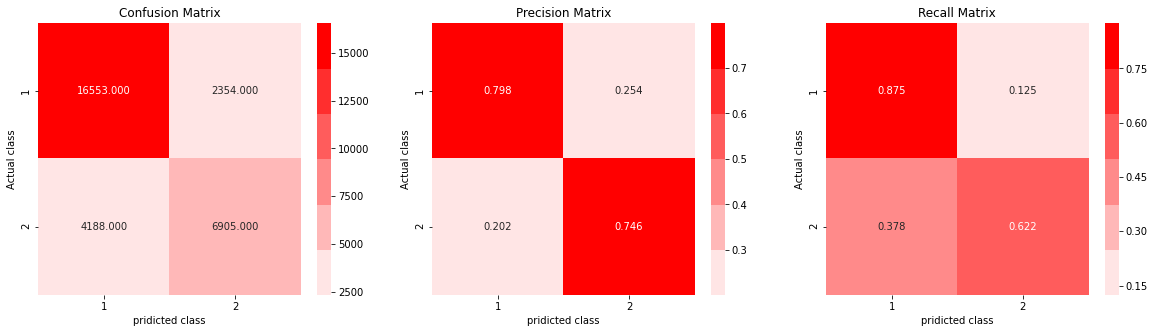

In [16]:
plot_confusion_matrix(y_test, predicted_y)

# Linear SVM


In [17]:
alpha = [10**i for i in range(-5,2)]

log_loss_list = []
for i in alpha :
    clf = SGDClassifier(alpha = i, penalty = 'l1', loss = "hinge", random_state =42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
    sig_clf.fit(X_train, y_train)
    pridict_y = sig_clf.predict_proba(X_test)
    log_loss_list.append(log_loss(y_test, pridict_y, labels = clf.classes_, eps = 1e-15))
    print("For value of alpha = ",i," The log loss is ", log_loss(y_test, pridict_y, labels = clf.classes_, eps = 1e-15))
    

For value of alpha =  1e-05  The log loss is  0.44718550813270946
For value of alpha =  0.0001  The log loss is  0.4875913084717123
For value of alpha =  0.001  The log loss is  0.509273178678257
For value of alpha =  0.01  The log loss is  0.46885820420121876
For value of alpha =  0.1  The log loss is  0.5330087436161797
For value of alpha =  1  The log loss is  0.6041089687687351
For value of alpha =  10  The log loss is  0.6382836814971304


In [24]:
best_alpha = np.argmin(log_loss_list)
clf = SGDClassifier(alpha = alpha[best_alpha], penalty = 'l1', loss = "hinge", random_state =42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
sig_clf.fit(X_train, y_train)
predict_y = sig_clf.predict_proba(X_train)

print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))

For values of best alpha =  1e-05 The train log loss is: 0.43722579069696815
For values of best alpha =  1e-05 The test log loss is: 0.44718550813270946
Total number of data points : 30000


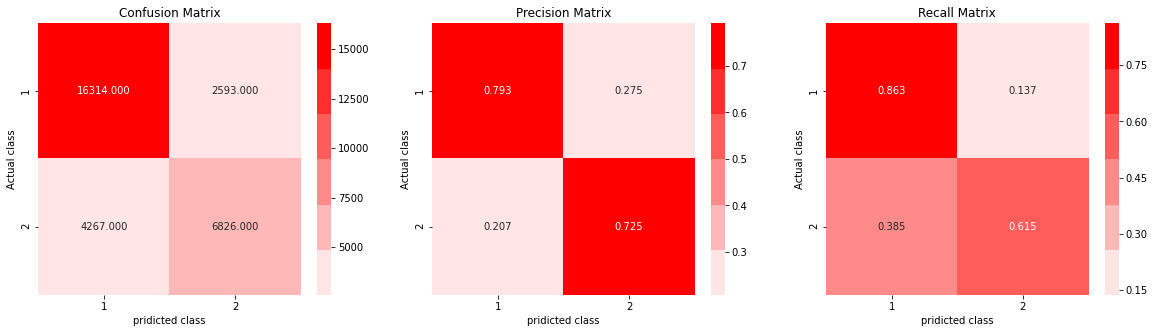

In [19]:
plot_confusion_matrix(y_test, predicted_y)

In [20]:
import xgboost as xgb
params = {}
params["objective"] = 'binary:logistic'
params["eval_metric"] = 'logloss'
params["eta"] = 0.02
params["max_depth"] = 4

d_train = xgb.DMatrix(X_train, label = y_train)
d_test = xgb.DMatrix(X_test, label = y_test)

watchlist = [(d_train, "train"), (d_test, "valid")]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)
xgdmat= xgb.DMatrix(X_train, y_train)
pridict_y= bst.predict(d_test)

print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68493	valid-logloss:0.68503
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61654	valid-logloss:0.61774
[20]	train-logloss:0.56509	valid-logloss:0.56708
[30]	train-logloss:0.52686	valid-logloss:0.52943
[40]	train-logloss:0.49768	valid-logloss:0.50092
[50]	train-logloss:0.47496	valid-logloss:0.47862
[60]	train-logloss:0.45682	valid-logloss:0.46084
[70]	train-logloss:0.44223	valid-logloss:0.44664
[80]	train-logloss:0.43041	valid-logloss:0.43516
[90]	train-logloss:0.42087	valid-logloss:0.42595
[100]	train-logloss:0.41279	valid-logloss:0.41814
[110]	train-logloss:0.40610	valid-logloss:0.41168
[120]	train-logloss:0.40050	valid-logloss:0.40633
[130]	train-logloss:0.39556	valid-logloss:0.40168
[140]	train-logloss:0.39116	valid-logloss:0.39749
[150]	train-logloss:0.38756	valid-logloss:0.39412
[160]	train-logloss:0.38436	valid-logloss:0.39115
[170]	trai

In [21]:
#predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))


Total number of data points : 30000


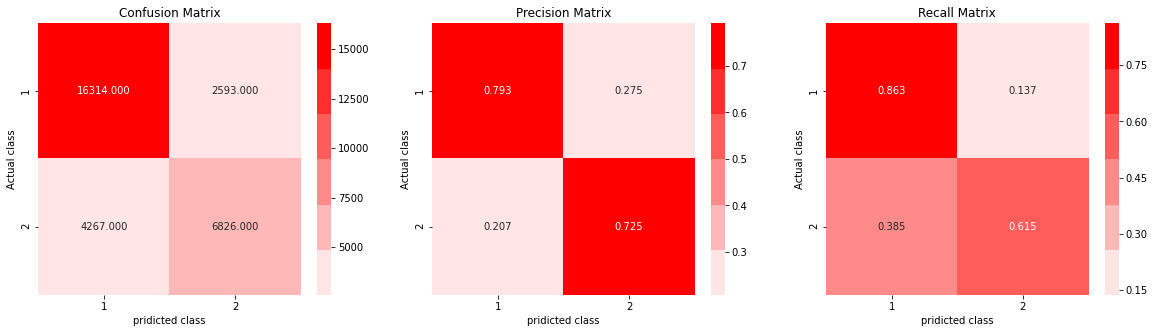

In [22]:
plot_confusion_matrix(y_test, predicted_y)